# Problem Set #8
MACS30100 Dr. Evans  
Xiuyuan Zhang


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

import warnings

warnings.filterwarnings("ignore") 
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 1
### (a) Create a scatterplot of the data where the x-variable is alcohol (alco) and the y-variable is color intensity (color int). Make the dot of each of the three possible cultivar types a different color. 

In [2]:
# import data
strongdrink = pd.read_csv('data/strongdrink.txt')
strongdrink.head(20)

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


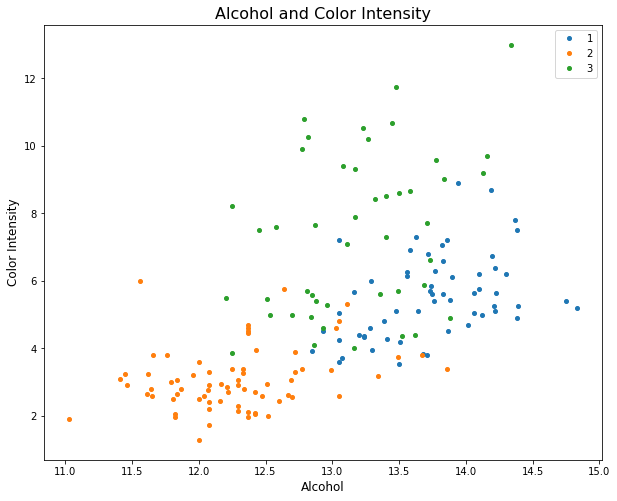

In [3]:
cultivars = strongdrink.groupby('cultivar')

fig, ax = plt.subplots(figsize=(10,8))
for kind, cultivar in cultivars:
    ax.plot(cultivar['alco'], cultivar['color_int'], marker = 'o',linestyle='', ms=4, label=kind)
ax.legend()
plt.xlabel('Alcohol', fontsize = 12)
plt.ylabel('Color Intensity', fontsize = 12)
plt.title('Alcohol and Color Intensity',fontsize = 16)
plt.show()

### (b) Use sklearn.linear model.LogisticRegression to fit a multinomial lo- gistic model of cultivar on features alcohol (alco), malic acid (malic), total phenols (tot phen), and color intensity (color int) with the following linear predictor.


In [4]:
# set variables
X = strongdrink[['alco', 'malic', 'tot_phen', 'color_int']].values
y = strongdrink['cultivar'].values

# set k-fold value
k = 4
clf_mlog = KFold(n_splits=k, random_state=22, shuffle=True)
clf_mlog.get_n_splits(X)
MSE = np.zeros(k)
C = np.zeros(200)
MSE_C = np.zeros(200)

for c in range(200):
    k_ind = int(0)
    for train_index, test_index in clf_mlog.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        LogReg = LogisticRegression(multi_class='multinomial',
                                    solver='newton-cg', C = (c/100 + 0.01))
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        error = y_test != y_pred
        MSE[k_ind] = error.mean()
        k_ind += 1
    C[c] = c/100 + 0.01
    MSE_C[c] =  MSE.mean()
MSE_multilog = pd.DataFrame({'C':C, 'MSE':MSE_C})

In [5]:
MSE_multilog.sort_values(['MSE']).head(10)

,C,MSE
43,0.44,0.068182
44,0.45,0.068182
42,0.43,0.068182
41,0.42,0.068182
40,0.41,0.068182
39,0.40,0.068182
27,0.28,0.068182
28,0.29,0.068182
29,0.30,0.068182
30,0.31,0.068182


One can see from the table above that when C takes value between 0.28-0.44 (with the penalty being 'l2'), the multinomial logistic model get the lowest MSE, which is 0.068182.

### (c) Use sklearn.ensemble.RandomForestClassifier to fit a random for- est model of cultivar on the same four features used in part (b). set bootstrap=True, set oob score=True, and set random state=22. Use OOB cross-validation to generate the MSE of your random forest classifier. Play with the values of the tuning parameters n estimators, max depth, and min samples leaf to try and find the lowest possible MSE from the OOB cross validation. Report your minimized overall MSE along with the tuning parameter values you used for n estimators, max depth, and min samples leaf.

In [6]:
MSE_rf = pd.DataFrame({"n_estimator" : np.zeros(5),
                         "min_sample" : np.zeros(5),
                         "max_depth" : np.zeros(5),
                         "MSE" : np.zeros(5)})
MSE_df = MSE_rf[:0]

for i in range(15):
    for j in range(15):
        for tree in range(5):
            rf = RandomForestClassifier(n_estimators = (tree * 50 + 50),
                                        min_samples_leaf = (i * 5 + 5),
                                        max_depth = (j + 1), bootstrap=True, 
                                        oob_score=True, random_state=22)
            rf.fit(X, y)
            MSE_rf["n_estimator"][tree] = tree * 50 + 50
            MSE_rf["max_depth"][tree] = j + 1
            MSE_rf["min_sample"][tree] = i * 5 + 5
            MSE_rf["MSE"][tree] = 1 - rf.oob_score_
        MSE_df= pd.concat([MSE_df, MSE_rf])

In [7]:
MSE_df.index = range(len(MSE_df))
MSE_df.sort_values(['MSE']).head(10)

,MSE,max_depth,min_sample,n_estimator
96,0.068182,5.0,10.0,100.0
126,0.068182,11.0,10.0,100.0
116,0.068182,9.0,10.0,100.0
131,0.068182,12.0,10.0,100.0
111,0.068182,8.0,10.0,100.0
106,0.068182,7.0,10.0,100.0
121,0.068182,10.0,10.0,100.0
101,0.068182,6.0,10.0,100.0
136,0.068182,13.0,10.0,100.0
86,0.068182,3.0,10.0,100.0


One can see that with the max_depth = 5, min_sample_leaf = 10 and the n_estimator = 100, the random forest model get its lowest MSE of 0.068182.

### (d) Use sklearn.svm.SVC to fit a support vector machines model of cultivar with a Gaussian radial basis function kernel kernel=’rbf’ on the four fea- tures used in parts (b) and (c). Fit the model using k-fold cross validation with k = 4 folds exactly as in part (b).

In [8]:
k = 4
clf_svm = KFold(n_splits=k, random_state=22, shuffle=True)
clf_svm.get_n_splits(X)
MSE = np.zeros(k)
MSE_C = pd.DataFrame({"C" : np.zeros(80),
                      "G" : np.zeros(80),
                      "MSE" : np.zeros(80)})
MSE_SVM = MSE_C[:0]

for g in range(80):
    for c in range(80):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            svc = svm.SVC(kernel='rbf', gamma = (g/20 + 0.05),
                          C=c/20 + 0.05)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            error = y_test != y_pred
            MSE[k_ind] = error.mean()
            k_ind += 1
        MSE_C['C'][c] = c/20 + 0.05
        MSE_C['G'][c] = g/20 + 0.05
        MSE_C['MSE'][c] =  MSE.mean()
    MSE_SVM = pd.concat([MSE_SVM, MSE_C])

In [9]:
MSE_SVM.index = range(len(MSE_SVM))
MSE_SVM.sort_values(['MSE']).head(25)

,C,G,MSE
2659,1.00,1.70,0.045455
2578,0.95,1.65,0.045455
2658,0.95,1.70,0.045455
224,3.25,0.15,0.051136
225,3.30,0.15,0.051136
226,3.35,0.15,0.051136
227,3.40,0.15,0.051136
228,3.45,0.15,0.051136
229,3.50,0.15,0.051136
218,2.95,0.15,0.051136


As one can see from the above table, when cost = 1, gamma = 1.7, the SVM model has the lowest MSE = 0.045455. With cost = 0.95, gamma = 1.65 or = 1.70, the SVM model can generate similar lowest MSE = 0.045455.

### (e) Use sklearn.neural network.MLPClassifier to fit a single hidden layer neural network model of cultivar. Fit the model using k-fold cross vali- dation with k = 4 folds exactly as in parts (b) and (d).

In [10]:
k = 4
kf = KFold(n_splits=k, random_state=22, shuffle=True)
kf.get_n_splits(X)
MSE = np.zeros(k)
activ = np.array(['identity', 'logistic', 'tanh', 'relu'])
MSE_al = pd.DataFrame({'activation' : np.zeros(20),
                       'hidden layer' : np.zeros(20),
                       'alpha' : np.zeros(20),
                       'MSE':np.zeros(20)})
MSE_mlp = MSE_al[:0]

for ac in range(4):
    for h in range(8):
        for al in range(20):
            k_ind = int(0)
            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                mlp = MLPClassifier(activation=activ[ac], solver='lbfgs',
                                    alpha=(al/20 + 0.05), 
                                    hidden_layer_sizes = ((50 * (h + 1)),))
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                error = y_test != y_pred
                MSE[k_ind] = error.mean()
                k_ind += 1
            MSE_al['activation'][al] = activ[ac]
            MSE_al['hidden layer'][al] = 50 * (h + 1)
            MSE_al['alpha'][al] = al/20 + 0.05
            MSE_al['MSE'][al] =  MSE.mean()
        MSE_mlp = pd.concat([MSE_mlp, MSE_al])

In [11]:
MSE_mlp.index = range(len(MSE_mlp))
MSE_mlp.sort_values(['MSE']).head(25)

,MSE,activation,alpha,hidden layer
505,0.034091,relu,0.30,100.0
554,0.039773,relu,0.75,200.0
608,0.039773,relu,0.45,350.0
543,0.039773,relu,0.20,200.0
571,0.039773,relu,0.60,250.0
586,0.039773,relu,0.35,300.0
610,0.045455,relu,0.55,350.0
542,0.045455,relu,0.15,200.0
545,0.045455,relu,0.30,200.0
550,0.045455,relu,0.55,200.0


One can see from the table above that when activation = relu, alpha = 0.3 and hidden layer = 100, the MLP model gets the lowest MSE, which is 0.034091.

### (f) Which of the above three models do you think is the best predictor of cultivar? Why?

In [12]:
logit = np.array(MSE_multilog.sort_values(['MSE']).head(5)['MSE'])
RF = np.array(MSE_df.sort_values(['MSE']).head(5)['MSE'])
SVM = np.array(MSE_SVM.sort_values(['MSE']).head(5)['MSE'])
mlp = np.array(MSE_mlp.sort_values(['MSE']).head(5)['MSE'])


Com = pd.DataFrame({'Logit':logit, 
                    'RF':RF,
                    'SVM':SVM,
                    'MLP':mlp})
Com

,Logit,MLP,RF,SVM
0,0.068182,0.034091,0.068182,0.045455
1,0.068182,0.039773,0.068182,0.045455
2,0.068182,0.039773,0.068182,0.045455
3,0.068182,0.039773,0.068182,0.051136
4,0.068182,0.039773,0.068182,0.051136


From the above table, comparing different MSE values, I think that the best predictor of cultivar is MLP.